# COMPSCI 369 - Assignment 3

- **Sabaoon Raza Khan**
- skha787@aucklanduni.ac.nz
- 983957824
<br><br>

### Question 1)
**Modelling the length of insertions in a genetic sequence using the geometric distribution and finding the maximum likelihood estimate.** <br><br> 
<hr> 
**(a)** Explain why the correct choice of geometric distribution for modelling the length of insertions is the one that takes values in {1, 2, 3, . . . } and has probability mass function $Pr(X = x) = (1 − p)^{x−1}p$.  

**Answer:**  
Since we're modelling the length of insertions and not the number of insertions in a genetic sequence, we would be counting the total number of trials required to get a single success. The version of the geometric distribution used to model this can only take values in {1, 2, 3, ...}, since it isn't possible to get a 0 length insertion. This would then give us the probability mass function $Pr(X = x) = (1 − p)^{x−1}p$.
<hr>

**(b)** Suppose we have sampled n independent insertions and found the $ith$ insertion to have length $k_{i}$. Let the data vector be $D = (k_{1}, k_{2}, . . . , k_{n})$. 
Write down an expression for the likelihood of data $D$, $L(p; D) = Pr(D|p)$. 
Make sure you simplify the expression so that any sums or products are moved as far to the right as possible.  

**Answer:**  
Using the fact that the observations are independent. That is, if $x_1, \ldots, x_k$ are independent and all from the same distribution with density $f$, then the joint density is $\prod_{i = 1}^n f(x_i)$. <br>

So, since n independent insertions have been sampled & the given data vector is $D = (k_{1}, k_{2}, . . . , k_{n})$, modelling it using the geometric distribution, the likelihood is given by:
$$L(p) = \prod_{i=1}^{n} p(1-p)^{k-1} = p^n (1-p)^{\sum_{i=1}^{n} (k_i-1)} $$
<hr>

**(c)** By finding the root of the derivative of the likelihood $L(p; D)$, show that the
maximum likelihood estimate of $p$ is $\frac{1}{m}$, where $m = \frac{1}{n}\sum_{i=1}^{n}k_{i}$ is the sample mean.  

**Answer:**  
Likelihood: $L(p) = \prod_{i=1}^{n} p(1-p)^{k-1} = p^n (1-p)^{\sum_{i=1}^{n} (k_i-1)} $
<br><br>
Then let $I(p) = ln*L(p);$  
$I(p) = n*ln(p) + \sum_{i=1}^{n} (k_i-1) ln(1-p)$ <br>

The maximum value of I(p), and hence of L(p) occurs when the partial derivative with respect to p equals 0: <br>
$$\frac{\partial I(p)}{\partial p} = \frac{n}{\hat{p}} - \frac{\sum_{i=1}^{n} (k_i-1)}{(1-\hat{p})} = 0$$ <br>

Rearranging:  
$$\frac{n}{\hat{p}} = \frac{\sum_{i=1}^{n} (k_i-1)}{(1-\hat{p})}$$ <br>
$$n(1-\hat{p}) = \hat{p} \sum_{i=1}^{n} (k_i-1)$$ <br>
$$n(1-\hat{p}) = \hat{p} \sum_{i=1}^{n} (k_i-n)$$ <br>
$$n - n\hat{p} = \hat{p} \sum_{i=1}^{n} (k_i-n)$$ <br>
$$n = \hat{p} (n + \sum_{i=1}^{n} (k_i-n))$$ <br>
$$\hat{p} = \frac{n}{n + \sum_{i=1}^{n} (k_i-n)}$$ <br>
$$\hat{p} = \frac{n}{\sum_{i=1}^{n} k_i}$$ <br>
$$\hat{p} = \frac{n/n}{\sum_{i=1}^{n} k_i / n}$$ <br>
$$\hat{p} = \frac{1}{\frac{1}{n} \sum_{i=1}^{n} k_i}$$ <br><br>

Given that $m = \frac{1}{n} \sum_{i=1}^{n} k_i$, where $m$ is the sample mean: <br>
$$\hat{p} = \frac{1}{m}$$ <br>
<hr>

### Question 2) 
Methods for generating from the exponential and Poisson distributions.
<br><br>
**Part (a)** Performing Exponential inverse transformation using the notes covered in class:
<br>

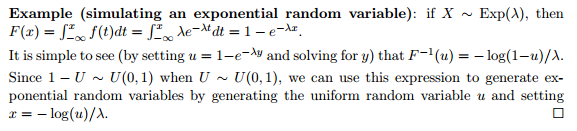

In [1]:
print()
from IPython.display import Image
Image(filename="inverseTransform.PNG")

<br>
**Uniform Random Value Transformation Formula (To exponential):** $$x = -log(u) / λ$$

In [2]:
import numpy
import numpy.linalg
import math

def rand_exp(rate, size):
    sampledValues = []
    λ = rate
    
    for trial in range(size):
        
        # Generate a random number "u" from 0 to 1
        u = numpy.random.uniform(0, 1)
        
        # Transforming the uniform random value to exponential
        x = - (math.log(u)) / λ
        sampledValues.append(x)
    
    # Converting list to numpy array & returning
    return numpy.asarray(sampledValues)

<br>
**Part (b) Inverse Transformation Function, that draws samples from the Poisson distribution.**

<br>
Using the fact that the number of events that occur in one time unit in a Poisson process with rate λ is Poisson distributed with rate parameter λ.  
Using rand_exp to simulate the Poisson process
<br><br>

**Algorithm Process:**
- Using the definition of Poisson processes. 
- N = Number of events (arrivals) in [0,1]. 
- Interarrival times are distributed exponentially, independently (with parameter λ). 
- Number of arrivals in Uniform(0,1), N, has Poisson distribution with parameter λ. 
- So we continuously generate Exponential(λ) random variables while their sum is not larger than 1.

In [3]:
def rand_poiss(rate, size):
    sampledValues = [] 
    
    for trial in range(size):
        Y = rand_exp(rate, 1)        # Using values generated by the random exponential function
        
        i = 0
        sum = Y 
        while (sum < 1):
            Y = rand_exp(rate, 1)
            sum = sum + Y 
            i += 1
        x = i
        sampledValues.append(x)

    return numpy.asarray(sampledValues)

<br>
**Part (c)** Making a histogram of 10000 samples from each function with the
rate parameter set at λ = 2 and comparing them to histograms of samples
drawn using analogous functions in the numpy.random library.

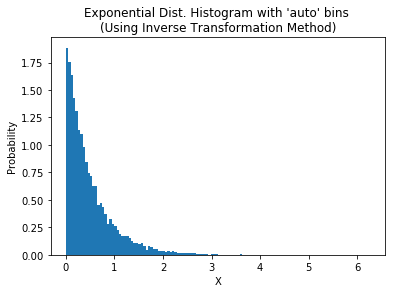

Mean of 'Exponential' inverse method function = 0.495
Variance of 'Exponential' inverse method function = 0.25



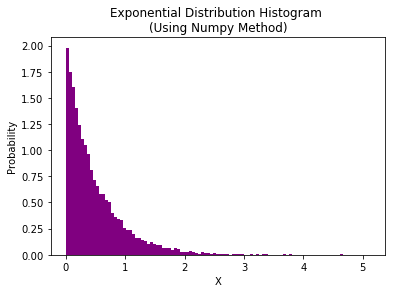

Mean of 'Exponential' numpy sampled data = 0.495
Variance of 'Exponential' numpy sampled data = 0.248


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



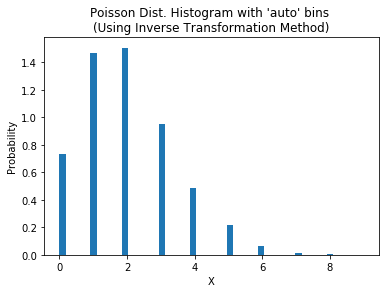

Mean of 'Poisson' inverse method function = 1.995
Variance of 'Poisson' inverse method function = 1.983



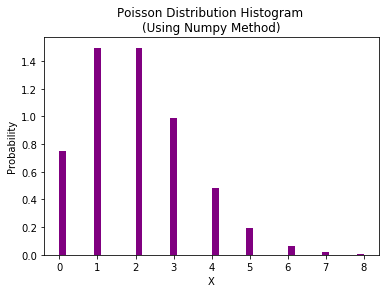

Mean of 'Poisson' numpy sampled data = 1.986
Variance of 'Poisson' numpy sampled data = 1.971



In [4]:
import math
import matplotlib.pyplot as plt

# Given parameters
sampleSize = 10000
rate = 2


# Creating histograms using the "Exponential" inverse method functions ----------------------------------------------
expRandomVal = rand_exp(rate, sampleSize)

plt.hist(expRandomVal, bins='auto', normed=True)                # plt.hist passes it's arguments to np.histogram
plt.title("Exponential Dist. Histogram with 'auto' bins \n(Using Inverse Transformation Method)")
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(expRandomVal)                               # Expected Value
Var = numpy.var(expRandomVal)                                   # Variance
print("Mean of 'Exponential' inverse method function =", round(ExpVal, 3))
print("Variance of 'Exponential' inverse method function =", round(Var, 3))
print()
# -------------------------------------------------------------------------------------------------------------------


# Creating histograms using analogous functions in the numpy.random library -----------------------------------------
s = numpy.random.exponential(1/rate, sampleSize)                # Randomly samplng values for each distribution

plt.hist(s, bins='auto', normed=True, color='purple')           # Creating histogram of sampled values
plt.title('Exponential Distribution Histogram \n(Using Numpy Method)')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                          # Expected Value
Var = numpy.var(s)                                              # Variance
print("Mean of 'Exponential' numpy sampled data =", round(ExpVal, 3))
print("Variance of 'Exponential' numpy sampled data =", round(Var, 3))
print()
# -------------------------------------------------------------------------------------------------------------------


print()
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print()


# Creating histograms using the "Poisson" inverse method functions --------------------------------------------------
poissRandomVal = rand_poiss(rate, sampleSize)

plt.hist(poissRandomVal, bins='auto', normed=True)              # plt.hist passes it's arguments to np.histogram
plt.title("Poisson Dist. Histogram with 'auto' bins \n(Using Inverse Transformation Method)")
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(poissRandomVal)                             # Expected Value
Var = numpy.var(poissRandomVal)                                 # Variance
print("Mean of 'Poisson' inverse method function =", round(ExpVal, 3))
print("Variance of 'Poisson' inverse method function =", round(Var, 3))
print()
# -------------------------------------------------------------------------------------------------------------------


# Creating histograms using analogous functions in the numpy.random library -----------------------------------------
s = numpy.random.poisson(rate, sampleSize)                      # Randomly samplng values for each distribution

plt.hist(s, bins='auto', normed=True, color='purple')           # Creating histogram of sampled values
plt.title('Poisson Distribution Histogram \n(Using Numpy Method)')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                          # Expected Value
Var = numpy.var(s)                                              # Variance
print("Mean of 'Poisson' numpy sampled data =", round(ExpVal, 3))
print("Variance of 'Poisson' numpy sampled data =", round(Var, 3))
print()
# -------------------------------------------------------------------------------------------------------------------

<br>
### Question 3)
Method that simulates a Markov chain on a finite state space with a given transition matrix.

**(a)** Write a method **check_matrix** that takes as input a matrix P.  
Returns a boolean output which is 1 if P is a valid transition matrix and 0 if is not.

In [5]:
def check_matrix(P):                                               # P: Type matrix
    row_sum = numpy.sum(P, axis=1)                                 # Finding sum of each row
    if abs(1 - row_sum[0]) < 0.000001:                             # Checking if first row almost adds up to 1
        if (abs(row_sum - row_sum[0]) < 0.000001).all(): return 1  # If first row == 1, check if all rows equal first. (True = 1)
        else: return 0                                             # If all rows don't equal first, return false. (False = 0)
    else: 
        return 0

**(b)** Write a method **markov_chain** that takes as input a matrix P, an integer
$n > 0$ and a start state s and returns a sampled path of length n starting in
state s from the Markov chain with transition matrix P. The method should
check that all inputs are valid. Use the **numpy.random.choice** method but
no other random number generation methods for this problem.

In [6]:
# P -> Transition Matrix
# n -> Respresents length (n > 0)
# s -> Represents start state

def markov_chain(P, n, s):
    rows, cols = P.shape
    
    if check_matrix(P) and (n > 0) and (s in range(1, cols+1)):        # Start state should lie in (0 < s <= cols)
        
        num_states = [a+1 for a in range(rows)]                        # Total no. of states = No. of columns
        probs = []
        for i in range(cols):
            probs += [P[s-1, i]]                                       # Probabilities in transition matrix given start state
            
        chain = numpy.random.choice(num_states, size = n, p = probs)
        return chain
        
    else:
        return ("Invalid Parameters")

**(c)** Write down the transition matrix for the Markov model and simulate a chain of length 10 starting in state 1.

In [7]:
transMatrix = numpy.matrix('0.2 0.3 0.5; 0.1 0.4 0.5; 0.2 0.2 0.6') 
length = 10
state = 1

print("Given Transition Matrix =")
print(transMatrix, "\n")

print("Simulated chain of length", length, "starting in state", state, ":")
print(markov_chain(transMatrix, length, state))
print()

Given Transition Matrix =
[[ 0.2  0.3  0.5]
 [ 0.1  0.4  0.5]
 [ 0.2  0.2  0.6]] 

Simulated chain of length 10 starting in state 1 :
[1 2 1 3 3 2 2 2 3 2]



**(d)** Simulate a single long chain starting at 1 and use it to estimate the probabilities $p_{1i}(∞)$ for $i ∈ {1, 2, 3}$. 
It is not necessary to print the chain to output. Check your answer by comparison with the n-step transition matrix, $P^n$, for some large value of n.


In [8]:
# p1i(∞) for i ∈ 1,2,3  -->  Probabilities in row 1 & columns 1,2,3.

n = 100000
stateNum = 1

print("Simulated chain of length", n, "starting in state", stateNum, ":")
sampledChain = markov_chain(transMatrix, n, stateNum)
print(sampledChain)
print()

print("Estimating probabilities:")
rows, cols = transMatrix.shape
for state in range(1, cols+1):
    print("i =", state, ":" ,((sampledChain == state).sum()/n))

print()
print("n-step transition matrix, where n = ", n, ":", sep = "")
n_step = transMatrix**n
print(n_step)

Simulated chain of length 100000 starting in state 1 :
[3 2 2 ..., 2 3 1]

Estimating probabilities:
i = 1 : 0.19936
i = 2 : 0.29965
i = 3 : 0.50099

n-step transition matrix, where n = 100000:
[[ 0.17283951  0.27160494  0.55555556]
 [ 0.17283951  0.27160494  0.55555556]
 [ 0.17283951  0.27160494  0.55555556]]


<br>
### Question 4)
<br>
**Part a:** Method that simulates pairs of sequences that have diverged from a recent common ancestor t time units ago. <br>
(Assuming that the evolution has occurred according to the Jukes Cantor model.)

In [9]:
import random

# Choosing a new base of given length uniformly at random
# from the four possible bases {A, C, G, T} to get the ancestral sequence.

def ancestral_sequence(length):
    return ''.join(numpy.random.choice(base_list, length))


# Evolution of a sequence S with per-site mutation rate µ.
# At a mutation, choose from the 3 possible bases to mutate to with equal probability or uniformly.

def descendant_sequence(S, µ, time):                  # Evolving sequence
    S = list(S)                                       # Strings are immutable so use list of chars
    λ = len(S) * 3/4 * µ                              # Rate of observable mutations (Ignore mutations from base X to base X). 
    for num in range(numpy.random.poisson(time * λ)): # Number of mutations over time t from a Poisson distribution. 
        i = math.floor(random.random() * len(S))
        S[i] = numpy.random.choice([base for base in base_list if base != S[i]])
    return ''.join(S)                                 # Convert to string


def simulate_siblingSeq(length, µ, time):
    D = ancestral_sequence(length)
    E = descendant_sequence(D, µ, time)
    F = descendant_sequence(D, µ, time)
    return D, E, F


# Simultaneously iterates over both strings, couples them together by index and compares each value.
# Keeps incrementing everytime it sees different letters.

def difference_count(seq1, seq2):
    return sum(1 for a, b in zip(seq1, seq2) if a != b) 

Using the data given to simulate sequences:

In [10]:
base_list = ['A', 'C', 'G', 'T']       # DNA Bases
length = 50                            # Sequence length
µ = 0.01                               # Mutation rate
time = 10

D, E, F = simulate_siblingSeq(length, µ, time)
print("\n Ancestral Sequence D =", D)
print("Descendant Sequence E =", E)
print("Descendant Sequence F =", F)

print("\nThe number of sites difference between:")
print("D and E =", difference_count(D, E))
print("D and F =", difference_count(D, F))
print("E and F =", difference_count(E, F))


 Ancestral Sequence D = GACAGCCCGAGTTTTCTAGCCTTTTGGGGTAAGGTTGGGTCTATGGGGAT
Descendant Sequence E = GACAGCCCGAGTTTTCTAGCGTGTTGGGGTCAGGTTGGGTGTGAGGGGAT
Descendant Sequence F = GACACCCCGAGTTTTCTTGACTTTTGGGGTAAGGTTGAGTCTATGGGGAT

The number of sites difference between:
D and E = 6
D and F = 4
E and F = 10


<br><hr>
**Part b:** 
The sum of independent Poisson variables is Poisson distributed by the sum of their parameters. Also, the mean, or expected value, of the Poisson distribution is equal to its parameter. Therefore, the expected number of mutations for a single process of evolution is $t\lambda = tL\frac{3}{4}\mu$ and the expected number of mutations between two sibling sequences is $2tL\frac{3}{4}\mu$. <br><br>

- Simulate 1000 pairs of sibling sequences of length 1000 with µ = 0.01 and t = 25. 
- For each simulated pair, count the number of sites at which they differ from each other. 
- Report the mean and variance of the number of differing sites.

In [11]:
pairs = 1000
length = 1000
µ = 0.01
t = 25

values = []                                          # Empty list

for index in range(pairs):
    _, E, F = simulate_siblingSeq(length, µ, t)      # Gets sibling sequences
    values.append(difference_count(E, F))            # Finds the count difference between the sequences & adds to list

value_array = numpy.asarray(values)                  # Coverting list to numpy array
mean = numpy.mean(value_array)                       # Finding mean of array
var = numpy.var(value_array)                         # Finding variance of array

print("\nMean of the number of differing sites:", round(mean, 3), "\nVariance of the number of differing sites:", round(var, 3))


Mean of the number of differing sites: 294.802 
Variance of the number of differing sites: 221.345


Since the number of mutations is not equivalent to the number of differing sites due to more than one mutation being able to occur at a single site; unlike the number of mutations being Poisson distributed with parameter $2tL\frac{3}{4}\mu$, the number of differing sites is not.

<br><hr>
**Part c:**
Simulate a pair of sibling sequences, $E$ and $F$, of length $10000$ with $t = 10$
and $µ = 0.03$ and use them to calculate the probabilities that a $G$ is aligned
to base $X$ for $X ∈ \{A, C, G, T\}$, pGX. Assume that $p_{ab} = p_{ba}$.
<br>
Your estimates for pGX should be close to the theoretical values
$$p_{GX} = \begin{cases}\frac{1}{4} + \frac{3}{4}\exp{\left(-2t\mu\right)} \text{ if } X = G \\ \frac{1}{4} - \frac{1}{4}\exp{\left(-2t\mu\right)} \text{ if } X \neq G \end{cases}$$

In [12]:
length = 10000
µ = 0.03
t = 10
_, E, F = simulate_siblingSeq(length, µ, t) 
    
    
count_E = 0  
for X in E:
    if X == 'G':
        theoretical_probE = ((1/4) + (3/4) * math.exp(-2 * t * µ))
        count_E += 1
simulated_probE = count_E / length

count_F = 0  
for X in F:
    if X == 'G':
        theoretical_probF = ((1/4) + (3/4) * math.exp(-2 * t * µ))
        count_F += 1
simulated_probF = count_F / length


print("For sibling sequence E:")
print("Theoretical Probability: ", round(theoretical_probE, 5), " = ", round(theoretical_probE*100, 5), "%", sep="")
print("Simulated Probability: ", round(simulated_probE, 5), " = ", round(simulated_probE*100, 5), "%", sep="")
print()
print("For sibling sequence F:")
print("Theoretical Probability: ", round(theoretical_probF, 5), " = ", round(theoretical_probF*100, 5), "%", sep="")
print("Simulated Probability: ", round(simulated_probF, 5), " = ", round(simulated_probF*100, 5), "%", sep="")

For sibling sequence E:
Theoretical Probability: 0.66161 = 66.16087%
Simulated Probability: 0.2509 = 25.09%

For sibling sequence F:
Theoretical Probability: 0.66161 = 66.16087%
Simulated Probability: 0.2472 = 24.72%


<br><hr>
**Part d:**
The number of insertion and deletion events would not be Poisson distributed because the event rate is not constant through time. At some time $t$ if an insertion of length $k$ occurs, immediately before $t$ the total rate of insertion and deletion  is $Lλ$, but right after $t$ it is $(L+k)λ$.